In [27]:
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec
import mpmath as mp


from nest import detectors, pls, skymap
from nest import overlap_try as overlap
from nest import nell_try as nell

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
f = np.logspace(0, 3, 1000)

print('Calculating Overlaps...')
print('- tensor modes')
R_t = overlap.overlap('LIGO H', 'LIGO L', f, 0, 't', None)
print('- vector modes')
R_v = overlap.overlap('LIGO H', 'LIGO L', f, 0, 'v', None)
print('- scalar modes')
R_s = overlap.overlap('LIGO H', 'LIGO L', f, 0, 's', None)

Calculating Overlaps...
- tensor modes
- vector modes
- scalar modes


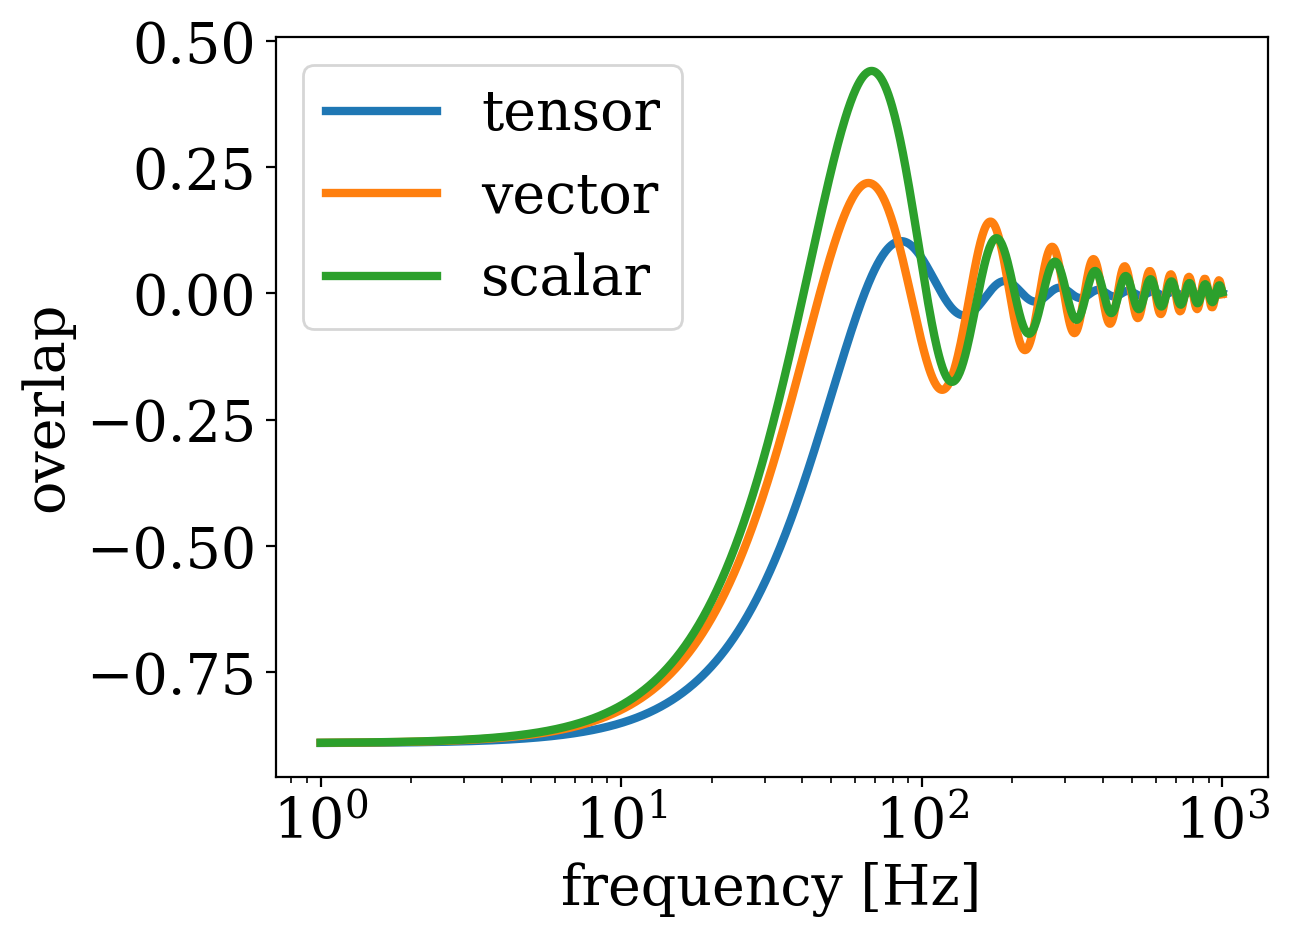

In [29]:
plt.plot(f, R_t, label='tensor')
plt.plot(f, R_v, label='vector')
plt.plot(f, R_s, label='scalar')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('frequency [Hz]')
plt.ylabel('overlap')
plt.legend()
plt.show()


In [30]:
print('Calculating Angular response for the monopole...')   
print('- tensor modes')
R0_t = nell.R_ell(0, 'LIGO H', 'LIGO L', f, 't', shift_angle=None)
print('- vector modes')
R0_v = nell.R_ell(0, 'LIGO H', 'LIGO L', f, 'v', shift_angle=None)
print('- scalar modes')
R0_s = nell.R_ell(0, 'LIGO H', 'LIGO L', f, 's', shift_angle=None)



Calculating Angular response for the monopole...
- tensor modes
- vector modes
- scalar modes


Text(0, 0.5, 'angular response')

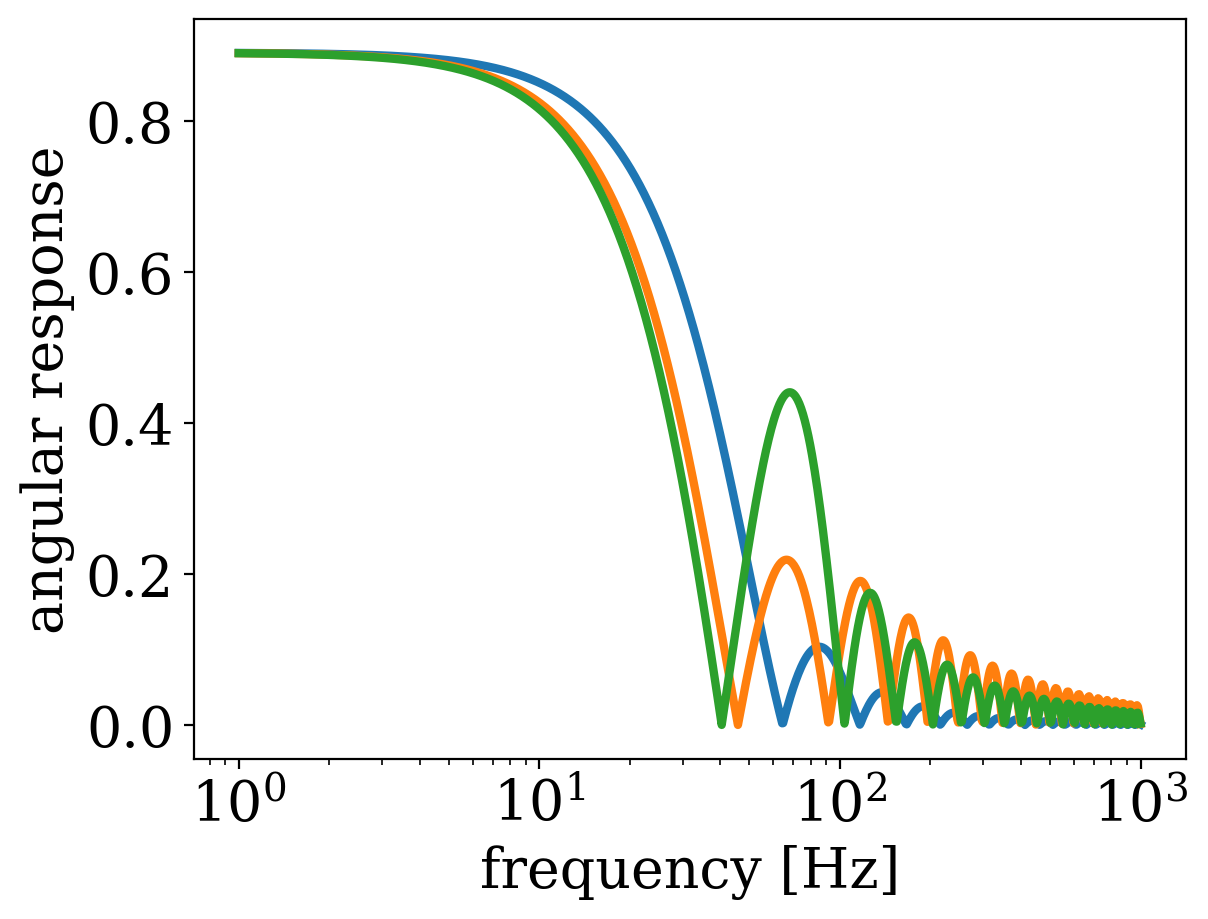

In [31]:
plt.plot(f, R0_t, label='tensor')
plt.plot(f, R0_v, label='vector')
plt.plot(f, R0_s, label='scalar')
plt.xscale('log')

plt.xlabel('frequency [Hz]')
plt.ylabel('angular response')


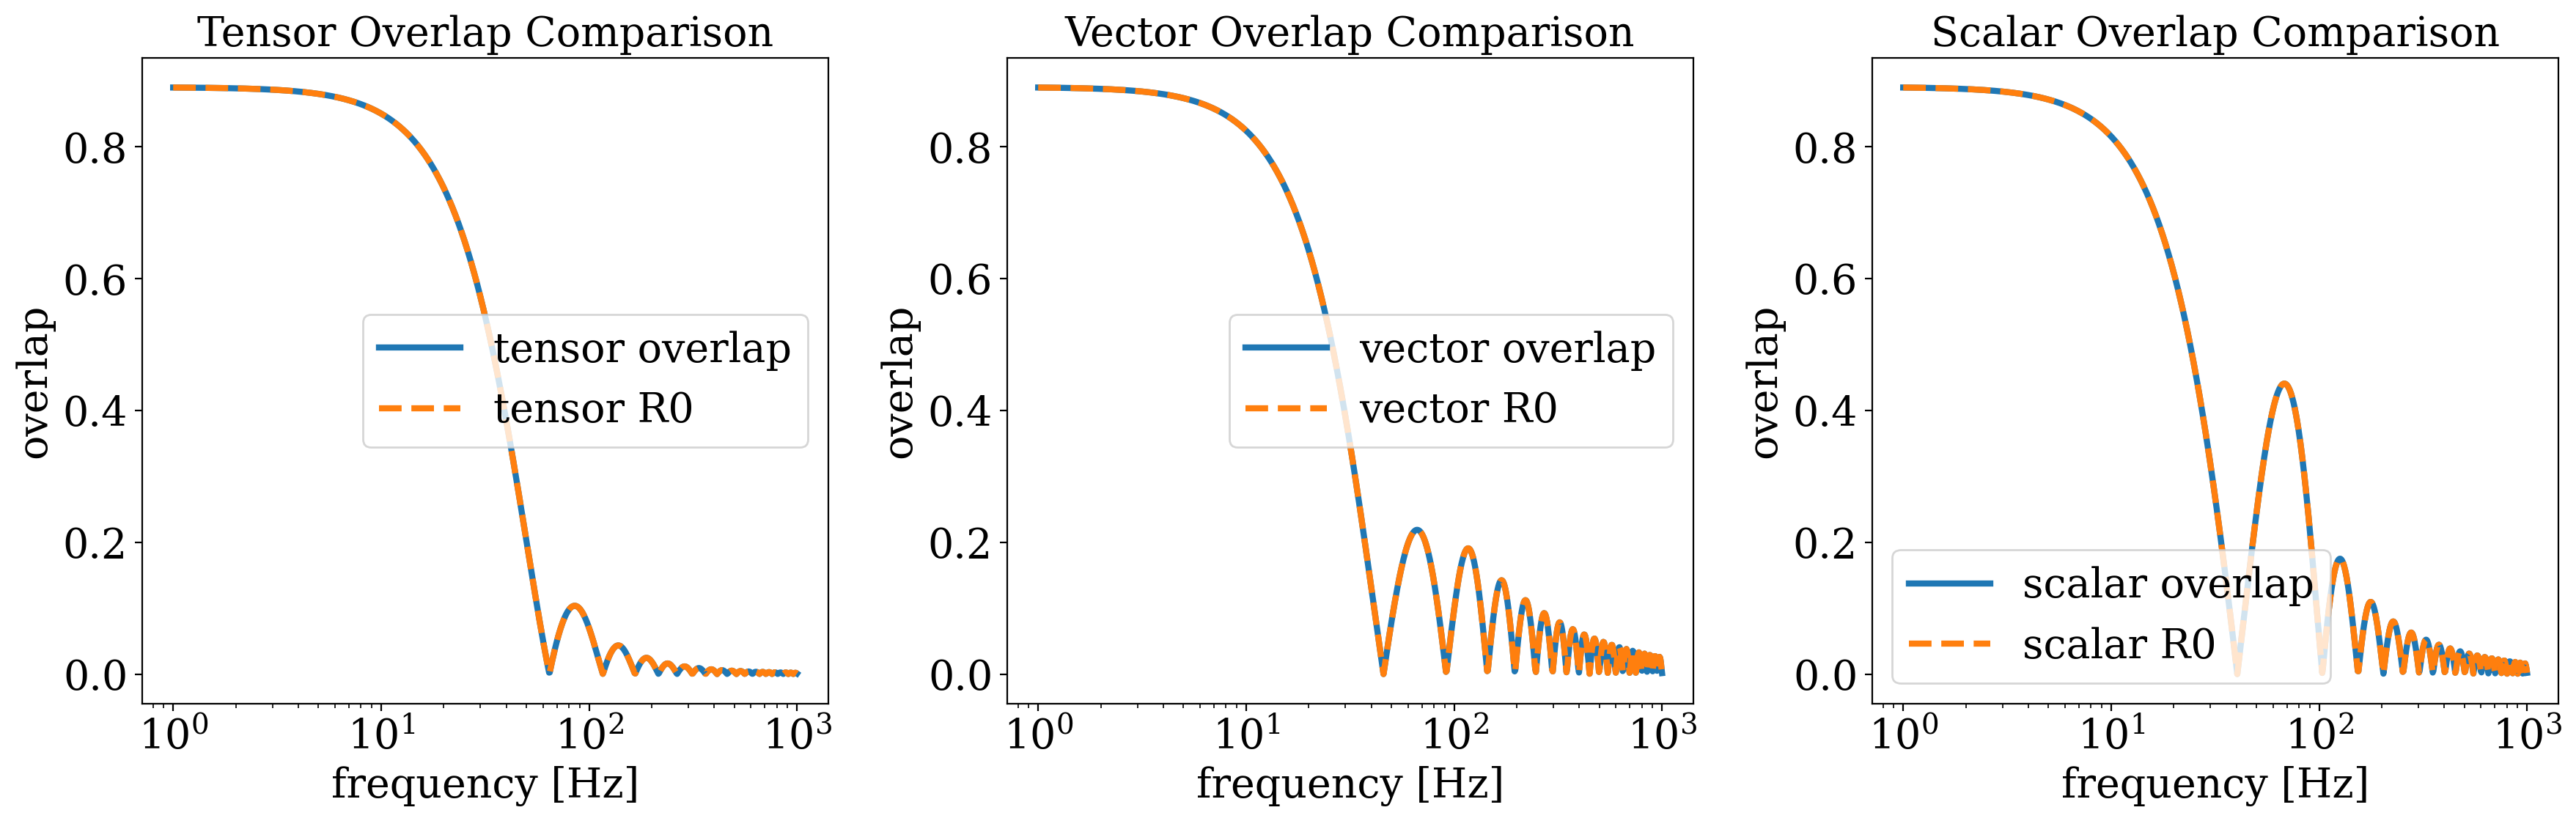

In [32]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Primo plot: tensor overlap
axs[0].plot(f, np.abs(R_t), label='tensor overlap')
axs[0].plot(f, R0_t, label='tensor R0', linestyle='--')
axs[0].set_xscale('log')
axs[0].set_xlabel('frequency [Hz]')
axs[0].set_ylabel('overlap')
axs[0].legend()
axs[0].set_title('Tensor Overlap Comparison')

# Secondo plot: vector overlap
axs[1].plot(f, np.abs(R_v), label='vector overlap')
axs[1].plot(f, R0_v, label='vector R0', linestyle='--')
axs[1].set_xscale('log')
axs[1].set_xlabel('frequency [Hz]')
axs[1].set_ylabel('overlap')
axs[1].legend()
axs[1].set_title('Vector Overlap Comparison')

# Terzo plot: scalar overlap
axs[2].plot(f, np.abs(R_s), label='scalar overlap')
axs[2].plot(f, R0_s, label='scalar R0', linestyle='--')
axs[2].set_xscale('log')
axs[2].set_xlabel('frequency [Hz]')
axs[2].set_ylabel('overlap')
axs[2].legend()
axs[2].set_title('Scalar Overlap Comparison')

plt.tight_layout()
plt.show()